Inspired from
https://scipython.com/book2/chapter-7-matplotlib/problems/p77/animation-of-the-diffusion-equation/

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Traceback (most recent call last):
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/adrienbanse/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [10]:
filename = "../src/sol.txt"

In [11]:
# Step 1: read data
f = open(filename, 'r')
nt, nx, ny = list(map(int, f.readlines(1)[0][:-1].split(" ")))
u = np.array_split(np.loadtxt(filename, skiprows = 1), nt)
for i in range(len(u)):
    u[i] = np.reshape(u[i], (nx, ny))
    
Lt = 300.
dt = Lt / (nt - 1)

<IPython.core.display.Javascript object>


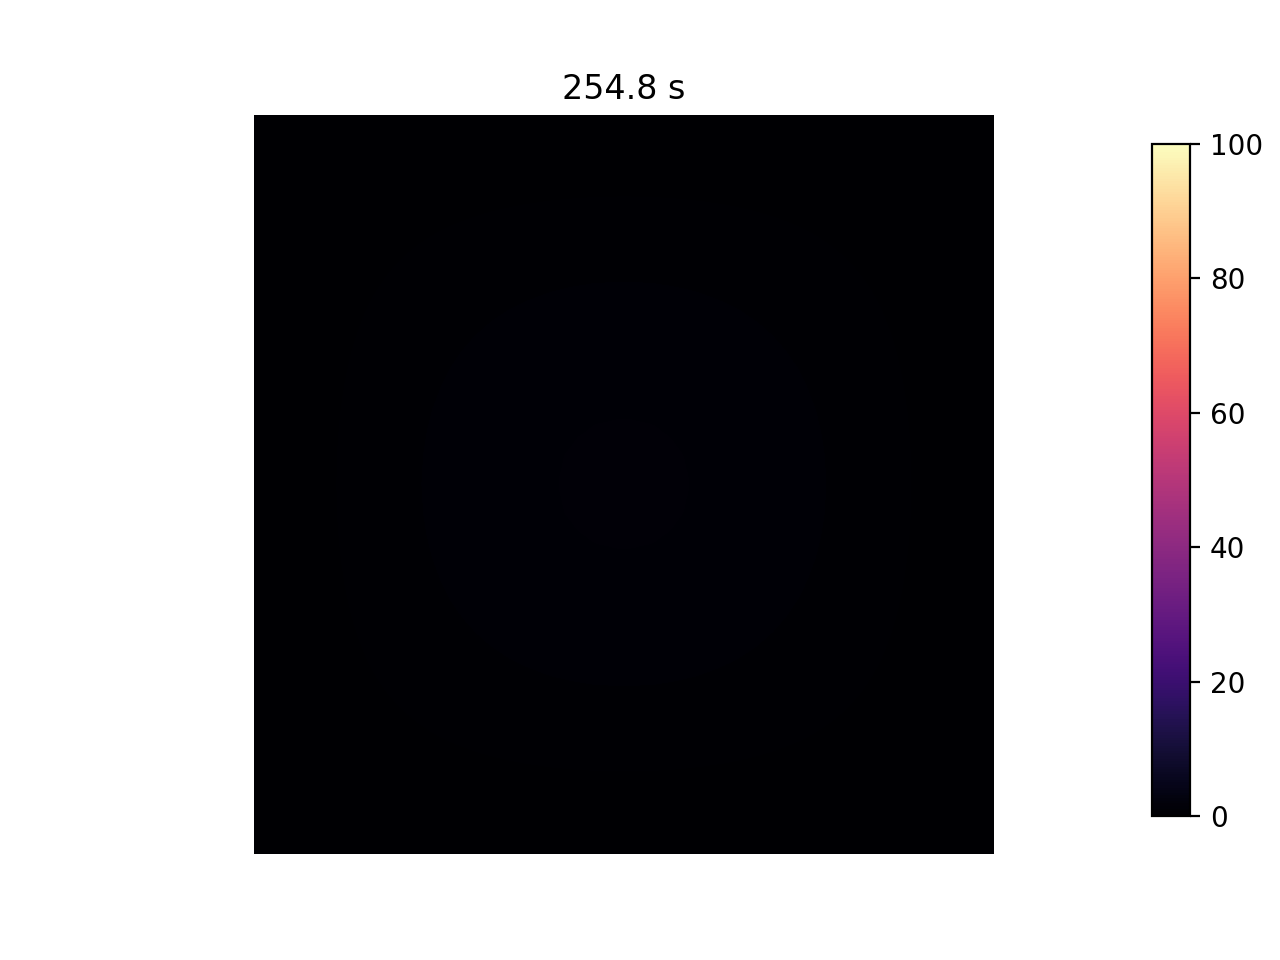

In [18]:
# Step 2: visualize
fig = plt.figure()
ax = fig.add_subplot()
im = ax.imshow(u[0], cmap=plt.get_cmap('magma'), vmin=0, vmax=100, interpolation='bicubic')
ax.set_axis_off()
ax.set_title('0.0 ms')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)

def animate(i):
    global u
    ax.set_title('{:.1f} s'.format(i*dt))
    im.set_data(u[i])

interval = 1
ani = animation.FuncAnimation(fig, animate, frames=nt, repeat=False,
                              interval=interval)
plt.show()